In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 pred_prob 和 labels 已经定义
# pred_prob = np.array([...])  # 预测概率数组
# labels = np.array([...])  # 实际标签数组



import numpy as np

def calculate_auc(y_true, y_scores):
    # 将真实标签和预测得分按预测得分降序排列
    sorted_indices = np.argsort(-y_scores)
    y_true_sorted = y_true[sorted_indices]
    y_scores_sorted = y_scores[sorted_indices]
    
    # 初始化变量
    n_pos = np.sum(y_true)
    n_neg = len(y_true) - n_pos
    tpr = 0.0
    fpr = 0.0
    auc = 0.0
    prev_fpr = 0.0
    prev_tpr = 0.0
    
    # 遍历排序后的样本
    for i in range(len(y_true)):
        if y_true_sorted[i] == 1:
            tpr += 1 / n_pos
        else:
            fpr += 1 / n_neg
        
        # 当FPR变化时，计算梯形面积并累加到AUC中
        if fpr != prev_fpr:
            auc += (fpr - prev_fpr) * (tpr + prev_tpr) / 2
            prev_fpr = fpr
            prev_tpr = tpr
    
    return auc

# 示例数据
y_true = np.array([0, 1, 1, 0, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.7])


y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])

y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

# 计算AUC
auc = calculate_auc(y_true, y_scores)
print("AUC:", auc)


AUC: 0.6249999999999999


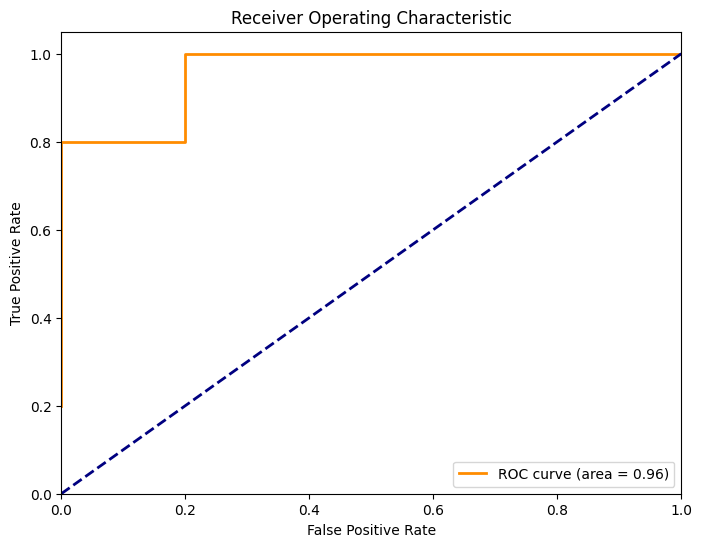

AUC: 0.9600000000000001


In [34]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_auc(y_true, y_scores):
    # 计算所有可能的阈值
    thresholds = np.sort(y_scores)
    
    # 初始化累积的 TP 和 FP
    tp = np.cumsum(y_true)
    fp = np.cumsum(1 - y_true)

    # 计算所有阈值的 TPR 和 FPR
    tpr = tp / np.sum(y_true)
    fpr = fp / np.sum(1 - y_true)

    # 计算 AUC
    auc = np.trapz(tpr, fpr)
    
    # 绘制ROC曲线
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return auc, tpr, fpr


y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

y_true = np.array([1, 0, 1, 1, 0, 0, 1])
y_scores = np.array([0.9, 0.2, 0.8, 0.7, 0.3, 0.4, 0.4])


y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])


y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])


auc, tpr, fpr = calculate_auc(y_true, y_scores)
print("AUC:", auc)


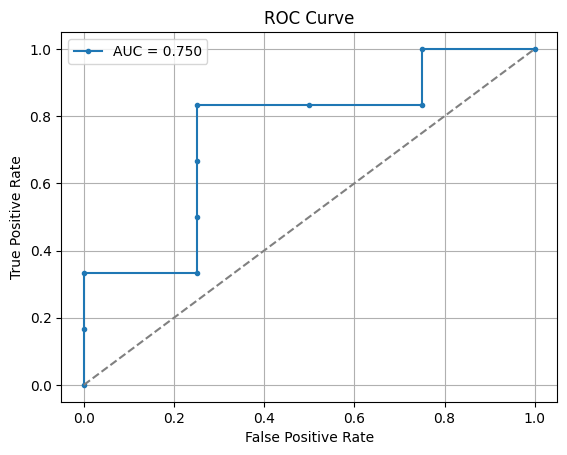

AUC: 0.750


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_auc(y_true, y_scores):
    # 转换为numpy数组
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    
    # 按预测得分降序排序
    sorted_indices = np.argsort(-y_scores)
    y_true_sorted = y_true[sorted_indices]
    y_scores_sorted = y_scores[sorted_indices]
    
    # 计算累积的真阳性和假阳性
    tp = np.cumsum(y_true_sorted)
    fp = np.cumsum(1 - y_true_sorted)
    
    # 计算总的正样本和负样本数
    total_pos = np.sum(y_true_sorted)
    total_neg = len(y_true_sorted) - total_pos
    
    # 计算TPR和FPR
    tpr = tp / total_pos if total_pos != 0 else np.zeros_like(tp)
    fpr = fp / total_neg if total_neg != 0 else np.zeros_like(fp)
    
    # 在曲线起点添加(0,0)
    tpr = np.concatenate([[0], tpr])
    fpr = np.concatenate([[0], fpr])
    
    # 计算AUC
    auc = np.trapz(tpr, fpr)
    
    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 随机猜测的对角线
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return auc

# 示例用法
if __name__ == "__main__":
    y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

    y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])

    y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
        
    auc_value = calculate_roc_auc(y_true, y_scores)
    print(f"AUC: {auc_value:.3f}")


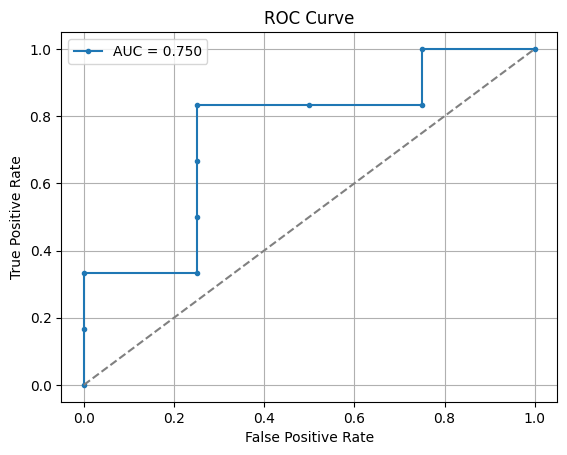

AUC: 0.750


In [36]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_auc(y_true, y_scores):
    # 转换为numpy数组
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    
    # 按预测得分降序排序
    sorted_indices = np.argsort(-y_scores)
    y_true_sorted = y_true[sorted_indices]
    y_scores_sorted = y_scores[sorted_indices]
    
    # 计算累积的真阳性和假阳性
    tp = np.cumsum(y_true_sorted)
    fp = np.cumsum(1 - y_true_sorted)
    
    # 计算总的正样本和负样本数
    total_pos = np.sum(y_true_sorted)
    total_neg = len(y_true_sorted) - total_pos
    
    # 计算TPR和FPR
    tpr = tp / total_pos if total_pos != 0 else np.zeros_like(tp)
    fpr = fp / total_neg if total_neg != 0 else np.zeros_like(fp)
    
    # 在曲线起点添加(0,0)
    tpr = np.concatenate([[0], tpr])
    fpr = np.concatenate([[0], fpr])
    
    # 计算AUC
    auc = np.trapz(tpr, fpr)
    
    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 随机猜测的对角线
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return auc

# 示例用法
if __name__ == "__main__":
    y_true = [1, 0, 1, 1, 0, 0, 1]
    y_scores = [0.9, 0.2, 0.8, 0.7, 0.3, 0.4, 0.4]

    y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])

    y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
    
    auc_value = calculate_roc_auc(y_true, y_scores)
    print(f"AUC: {auc_value:.3f}")


In [31]:
from sklearn.metrics import auc

y_true = np.array([1, 0, 1, 1, 0, 0, 1])
y_scores = np.array([0.9, 0.2, 0.8, 0.7, 0.3, 0.4, 0.8])

y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])


fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)

print("sklearn:",auc(fpr, tpr))

sklearn: 0.92


In [ ]:
# 方法二，利用AUC关于排列概率的定义计算
    auc2 = 0
    P_ind = []  # 正样本下标
    F_ind = []  # 负样本下标
    P_F = 0  # 正样本分数高于负样本的数量
    F_P = 0  # 负样本分数高于正样本的数量

    #  计数过程
    for ind, val in enumerate(labels):
        if val > 0.5:
            P_ind.append(ind)
        else:
            F_ind.append(ind)
    for Pi in P_ind:
        for Fi in F_ind:
            if pred_prob[Pi] > pred_prob[Fi]:
                P_F += 1
            else:
                F_P += 1
    auc2 = P_F/(len(P_ind)*len(F_ind))
    print("方法二 auc:", auc2)

In [ ]:
基于sklearn库，直接调用metic：

import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

if __name__ == '__main__':

    y = np.array([1,0,0,0,1,0,1,0,])
    pred = np.array([0.9, 0.8, 0.3, 0.1,0.4,0.9,0.66,0.7])

    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
    print("-----sklearn:",auc(fpr, tpr))

In [ ]:
import numpy as np


def auc_calculate(labels, preds, n_bins=100):
    postive_len = sum(labels)  # 正样本数量（因为正样本都是1）
    negative_len = len(labels) - postive_len  # 负样本数量
    total_case = postive_len * negative_len  # 正负样本对
    pos_histogram = [0 for _ in range(n_bins)]
    neg_histogram = [0 for _ in range(n_bins)]
    bin_width = 1.0 / n_bins
    for i in range(len(labels)):
        nth_bin = int(preds[i] / bin_width)
        if labels[i] == 1:
            pos_histogram[nth_bin] += 1
        else:
            neg_histogram[nth_bin] += 1
    accumulated_neg = 0
    satisfied_pair = 0
    for i in range(n_bins):
        satisfied_pair += (pos_histogram[i] * accumulated_neg + pos_histogram[i] * neg_histogram[i] * 0.5)
        accumulated_neg += neg_histogram[i]
        # print(i,satisfied_pair,accumulated_neg)
    return satisfied_pair / float(total_case)


if __name__ == '__main__':
    y = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
    pred = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])

    print("auc:", auc_calculate(y, pred))